In [1]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pylab
pylab.rcParams['figure.figsize'] = (15, 10)
import matplotlib.pyplot as plt

In [4]:
#itog = np.loadtxt('/content/drive/MyDrive/data-preparation-2-result.csv', delimiter=",")

ValueError: ignored

In [7]:
data=pd.read_csv('/content/drive/MyDrive/data-preparation-2-result.csv', encoding='utf-8')
data.head(1)

,Unnamed: 0.1,Unnamed: 0,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,...,Count_vec Similarity_Страна_Изготовитель,TF-idf Similarity_Страна_Изготовитель,Count_vec Similarity_Персонаж,TF-idf Similarity_Персонаж,Count_vec Similarity_Бренд,TF-idf Similarity_Бренд,Count_vec Similarity_Характеристики<10%_отсутствующие значения,TF-idf Similarity_Характеристики<10%_отсутствующие значения,Count_vec Similarity_Характеристики>10%_отсутствующие значения,TF-idf Similarity_Характеристики>10%_отсутствующие значения
0,0,0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
copydata=data.copy()
copydata.shape

(121, 72)

In [10]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [13]:
copydata.head(10)

,Unnamed: 0.1,Unnamed: 0,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2,Count_vec Similarity_название,TF-idf Similarity_название,Count_vec Similarity_описание,TF-idf Similarity_описание,Count_vec Similarity_Тип,TF-idf Similarity_Тип,Count_vec Similarity_Материал,TF-idf Similarity_Материал,Count_vec Similarity_Вид_игрушки,\tTF-idf Similarity_Вид_игрушки,Count_vec Similarity_Цвет,TF-idf Similarity_Цвет,Count_vec Similarity_Доп_Функции,TF-idf Similarity_Доп_Функции,Count_vec Similarity_Страна_Изготовитель,TF-idf Similarity_Страна_Изготовитель,Count_vec Similarity_Персонаж,TF-idf Similarity_Персонаж,Count_vec Similarity_Бренд,TF-idf Similarity_Бренд,Count_vec Similarity_Характеристики<10%_отсутствующие значения,TF-idf Similarity_Характеристики<10%_отсутствующие значения,Count_vec Similarity_Характеристики>10%_отсутствующие значения,TF-idf Similarity_Характеристики>10%_отсутствующие значения
0,0,0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,0,0,0.0,0.000000,0.000000,0.000000,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай Ам Ням БрендНеИзвестен,Без эффектов Китай Ам Ням БрендНеИзвестен,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000
1,1,1,2,1,2,https://www.ozon.ru/product/detskaya-myagkaya-...,Детская мягкая игрушка Ам-ням для девочек для ...,392,384,"Ам-НямМягкий, нежный друг для ребенка!!!",Мягкая игрушка,Искусственные материалы,Герои мультфильмов,15.0,Зеленый,Без эффектов,Китай,0 месяцев,ПерсонажНеИзвестен,Унисекс,SIDORI,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,38,37,5.0,0.096939,0.096354,0.333333,Мягкая игрушка Искусственные материалы Герои м...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай ПерсонажНеИзвестен SIDORI,Без эффектов Китай Ам Ням БрендНеИзвестен,0.554700,0.403604,0.124035,0.067436,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.589256,0.421136,0.447214,0.291219
2,2,2,3,1,3,https://www.ozon.ru/product/am-nyam-myagkaya-i...,Ам ням мягкая игрушка/Cut the Rope Ам ням/зеле...,419,411,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,МатериалНеИзвестен,Лягушка,18.0,Зеленый,ДополнительныеФункцииНеИзвестны,CтранаИзготовительНеИзвестна,От 2 лет,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozo

In [ ]:
#copydata['Материал1'].fillna('МатериалНеИзвестен', inplace=True)
# Заменяем пустые значения на "материалнеизвестен" либо можно заменить на наиболее часто встречающиеся значения

In [31]:
# заменяем значения в косинусной близости на 0, если данные изначельно не были заполнены, чтобы при совпадении товаров с незаполненными параметрами
# не давал значение косинусной близости1

# Applying the condition
#df['gender'].mask(df['gender'] == 'female', 0, inplace=True)

copydata['TF-idf Similarity_Бренд'].mask(copydata['Бренд1'] == 'БрендНеИзвестен', 0, inplace=True)
copydata['Count_vec Similarity_Бренд'].mask(copydata['Бренд1'] == 'БрендНеИзвестен', 0, inplace=True)
copydata['TF-idf Similarity_Доп_Функции'].mask(copydata['Дополнительные функции1'] == 'ДополнительныеФункцииНеИзвестны', 0, inplace=True)
copydata['Count_vec Similarity_Доп_Функции'].mask(copydata['Дополнительные функции1'] == 'ДополнительныеФункцииНеИзвестны', 0, inplace=True)
copydata['TF-idf Similarity_Страна_Изготовитель'].mask(copydata['Страна-изготовитель1'] == 'CтранаИзготовительНеИзвестна', 0, inplace=True)
copydata['Count_vec Similarity_Страна_Изготовитель'].mask(copydata['Страна-изготовитель1'] == 'CтранаИзготовительНеИзвестна', 0, inplace=True)
copydata['TF-idf Similarity_Персонаж'].mask(copydata['Персонаж1'] == 'ПерсонажНеИзвестен', 0, inplace=True)
copydata['Count_vec Similarity_Персонаж'].mask(copydata['Персонаж1'] == 'ПерсонажНеИзвестен', 0, inplace=True)

#TF-idf Similarity_Бренд
#Count_vec Similarity_Бренд
#Бренд1
#БрендНеИзвестен	
#Дополнительные функции1
#ДополнительныеФункцииНеИзвестны
#Страна-изготовитель1
#CтранаИзготовительНеИзвестна
#Персонаж1
#ПерсонажНеИзвестен



In [43]:
copydata1 = copydata

In [32]:
copydata.head(10)


,Unnamed: 0.1,Unnamed: 0,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2,Count_vec Similarity_название,TF-idf Similarity_название,Count_vec Similarity_описание,TF-idf Similarity_описание,Count_vec Similarity_Тип,TF-idf Similarity_Тип,Count_vec Similarity_Материал,TF-idf Similarity_Материал,Count_vec Similarity_Вид_игрушки,\tTF-idf Similarity_Вид_игрушки,Count_vec Similarity_Цвет,TF-idf Similarity_Цвет,Count_vec Similarity_Доп_Функции,TF-idf Similarity_Доп_Функции,Count_vec Similarity_Страна_Изготовитель,TF-idf Similarity_Страна_Изготовитель,Count_vec Similarity_Персонаж,TF-idf Similarity_Персонаж,Count_vec Similarity_Бренд,TF-idf Similarity_Бренд,Count_vec Similarity_Характеристики<10%_отсутствующие значения,TF-idf Similarity_Характеристики<10%_отсутствующие значения,Count_vec Similarity_Характеристики>10%_отсутствующие значения,TF-idf Similarity_Характеристики>10%_отсутствующие значения
0,0,0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,0,0,0.0,0.000000,0.000000,0.000000,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай Ам Ням БрендНеИзвестен,Без эффектов Китай Ам Ням БрендНеИзвестен,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000
1,1,1,2,1,2,https://www.ozon.ru/product/detskaya-myagkaya-...,Детская мягкая игрушка Ам-ням для девочек для ...,392,384,"Ам-НямМягкий, нежный друг для ребенка!!!",Мягкая игрушка,Искусственные материалы,Герои мультфильмов,15.0,Зеленый,Без эффектов,Китай,0 месяцев,ПерсонажНеИзвестен,Унисекс,SIDORI,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,38,37,5.0,0.096939,0.096354,0.333333,Мягкая игрушка Искусственные материалы Герои м...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай ПерсонажНеИзвестен SIDORI,Без эффектов Китай Ам Ням БрендНеИзвестен,0.554700,0.403604,0.124035,0.067436,1.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.0,1.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.589256,0.421136,0.447214,0.291219
2,2,2,3,1,3,https://www.ozon.ru/product/am-nyam-myagkaya-i...,Ам ням мягкая игрушка/Cut the Rope Ам ням/зеле...,419,411,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,МатериалНеИзвестен,Лягушка,18.0,Зеленый,ДополнительныеФункцииНеИзвестны,CтранаИзготовительНеИзвестна,От 2 лет,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozo

In [44]:
copydata1.head(1)

,Unnamed: 0.1,Unnamed: 0,Номер пары,Идентичность пары,Порядковый номер1,ссылка1,название1,цена1,цена по карте1,Описание1,Тип1,Материал1,Вид игрушки1,"Высота игрушки, см1",Цвет1,Дополнительные функции1,Страна-изготовитель1,Минимальный возраст ребенка1,Персонаж1,Пол ребенка1,Бренд1,Порядковый номер2,ссылка2,название2,цена2,цена по карте2,Описание2,Тип2,Материал2,Вид игрушки2,"Высота игрушки, см2",Цвет2,Дополнительные функции2,Страна-изготовитель2,Минимальный возраст ребенка2,Персонаж2,Пол ребенка2,Бренд2,"Разница между столбцами ""цена1"" и ""цена2""","Разница между столбцами ""цена по карте1"" и ""цена по карте2""","Разница между столбцами ""Высота игрушки, см1"" и ""Высота игрушки, см2""",Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Характеристики отсутствующие значения <10%_1,Характеристики отсутствующие значения <10%_2,Характеристики отсутствующие значения >10%_1,Характеристики отсутствующие значения >10%_2,Count_vec Similarity_название,TF-idf Similarity_название,Count_vec Similarity_описание,TF-idf Similarity_описание,Count_vec Similarity_Тип,TF-idf Similarity_Тип,Count_vec Similarity_Материал,TF-idf Similarity_Материал,Count_vec Similarity_Вид_игрушки,\tTF-idf Similarity_Вид_игрушки,Count_vec Similarity_Цвет,TF-idf Similarity_Цвет,Count_vec Similarity_Доп_Функции,TF-idf Similarity_Доп_Функции,Count_vec Similarity_Страна_Изготовитель,TF-idf Similarity_Страна_Изготовитель,Count_vec Similarity_Персонаж,TF-idf Similarity_Персонаж,Count_vec Similarity_Бренд,TF-idf Similarity_Бренд,Count_vec Similarity_Характеристики<10%_отсутствующие значения,TF-idf Similarity_Характеристики<10%_отсутствующие значения,Count_vec Similarity_Характеристики>10%_отсутствующие значения,TF-idf Similarity_Характеристики>10%_отсутствующие значения
0,0,0,1,1,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,1,https://www.ozon.ru/product/myagkaya-igrushka-...,Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см,430,421,Лягушонок Ам Ням из игры Cut the Rope обязател...,Мягкая игрушка,Плюш,Лягушка,20.0,Зеленый,Без эффектов,Китай,10 месяцев,Ам Ням,Унисекс,БрендНеИзвестен,0,0,0.0,0.0,0.0,0.0,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Мягкая игрушка Плюш Лягушка Зеленый 10 месяцев...,Без эффектов Китай Ам Ням БрендНеИзвестен,Без эффектов Китай Ам Ням БрендНеИзвестен,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [33]:
from sklearn import preprocessing

In [34]:
from sklearn.preprocessing import MinMaxScaler


In [45]:
copydata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 72 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Unnamed: 0.1                                                           121 non-null    int64  
 1   Unnamed: 0                                                             121 non-null    int64  
 2   Номер пары                                                             121 non-null    int64  
 3   Идентичность пары                                                      121 non-null    int64  
 4   Порядковый номер1                                                      121 non-null    int64  
 5   ссылка1                                                                121 non-null    object 
 6   название1                                                              121 non-null    obj

In [52]:
copydata1.columns.values

array(['Unnamed: 0.1', 'Unnamed: 0', 'Номер пары', 'Идентичность пары',
       'Порядковый номер1', 'ссылка1', 'название1', 'цена1',
       'цена по карте1', 'Описание1', 'Тип1', 'Материал1', 'Вид игрушки1',
       'Высота игрушки, см1', 'Цвет1', 'Дополнительные функции1',
       'Страна-изготовитель1', 'Минимальный возраст ребенка1',
       'Персонаж1', 'Пол ребенка1', 'Бренд1', 'Порядковый номер2',
       'ссылка2', 'название2', 'цена2', 'цена по карте2', 'Описание2',
       'Тип2', 'Материал2', 'Вид игрушки2', 'Высота игрушки, см2',
       'Цвет2', 'Дополнительные функции2', 'Страна-изготовитель2',
       'Минимальный возраст ребенка2', 'Персонаж2', 'Пол ребенка2',
       'Бренд2', 'Разница между столбцами "цена1" и "цена2"',
       'Разница между столбцами "цена по карте1" и "цена по карте2"',
       'Разница между столбцами "Высота игрушки, см1" и "Высота игрушки, см2"',
       'Относительная разница в цене',
       'Относительная разница в цене по карте',
       'Относительная ра

In [ ]:
proverka_1 = 

In [60]:
copydata_dlya_analiza=  copydata.loc[:,['Номер пары', 'Идентичность пары', 'Относительная разница в цене', 'Относительная разница в цене по карте',
                                 'Относительная разница в высоте игрушки', 'Count_vec Similarity_название', 'TF-idf Similarity_название', 
                                 'Count_vec Similarity_описание', 'TF-idf Similarity_описание', 
                                 'Count_vec Similarity_Тип', 'TF-idf Similarity_Тип', 
                                 'Count_vec Similarity_Материал', 'TF-idf Similarity_Материал', 
                                 'Count_vec Similarity_Вид_игрушки', 
                                 '\tTF-idf Similarity_Вид_игрушки', 'Count_vec Similarity_Цвет', 
                                 'TF-idf Similarity_Цвет', 'Count_vec Similarity_Доп_Функции', 
                                 'TF-idf Similarity_Доп_Функции', 
                                 'Count_vec Similarity_Страна_Изготовитель', 
                                 'TF-idf Similarity_Страна_Изготовитель', 
                                 'Count_vec Similarity_Персонаж', 'TF-idf Similarity_Персонаж', 
                                 'Count_vec Similarity_Бренд', 'TF-idf Similarity_Бренд', 'Count_vec Similarity_Характеристики<10%_отсутствующие значения', 
                                 'TF-idf Similarity_Характеристики<10%_отсутствующие значения', 
                                 'Count_vec Similarity_Характеристики>10%_отсутствующие значения', 
                                 'TF-idf Similarity_Характеристики>10%_отсутствующие значения']]
    



In [63]:
copydata_dlya_analiza.set_index('Номер пары').head(1)

,Идентичность пары,Относительная разница в цене,Относительная разница в цене по карте,Относительная разница в высоте игрушки,Count_vec Similarity_название,TF-idf Similarity_название,Count_vec Similarity_описание,TF-idf Similarity_описание,Count_vec Similarity_Тип,TF-idf Similarity_Тип,Count_vec Similarity_Материал,TF-idf Similarity_Материал,Count_vec Similarity_Вид_игрушки,\tTF-idf Similarity_Вид_игрушки,Count_vec Similarity_Цвет,TF-idf Similarity_Цвет,Count_vec Similarity_Доп_Функции,TF-idf Similarity_Доп_Функции,Count_vec Similarity_Страна_Изготовитель,TF-idf Similarity_Страна_Изготовитель,Count_vec Similarity_Персонаж,TF-idf Similarity_Персонаж,Count_vec Similarity_Бренд,TF-idf Similarity_Бренд,Count_vec Similarity_Характеристики<10%_отсутствующие значения,TF-idf Similarity_Характеристики<10%_отсутствующие значения,Count_vec Similarity_Характеристики>10%_отсутствующие значения,TF-idf Similarity_Характеристики>10%_отсутствующие значения
Номер пары,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [75]:
#itog

In [76]:
#out = itog[:,288]
#itog = itog[:,:288]

In [77]:
#out

In [78]:
#itog

In [80]:
 out = copydata_dlya_analiza.loc[:,'Идентичность пары']
 input = copydata_dlya_analiza.loc[:,['Относительная разница в цене', 'Относительная разница в цене по карте',
                                 'Относительная разница в высоте игрушки', 'Count_vec Similarity_название', 'TF-idf Similarity_название', 
                                 'Count_vec Similarity_описание', 'TF-idf Similarity_описание', 
                                 'Count_vec Similarity_Тип', 'TF-idf Similarity_Тип', 
                                 'Count_vec Similarity_Материал', 'TF-idf Similarity_Материал', 
                                 'Count_vec Similarity_Вид_игрушки', 
                                 '\tTF-idf Similarity_Вид_игрушки', 'Count_vec Similarity_Цвет', 
                                 'TF-idf Similarity_Цвет', 'Count_vec Similarity_Доп_Функции', 
                                 'TF-idf Similarity_Доп_Функции', 
                                 'Count_vec Similarity_Страна_Изготовитель', 
                                 'TF-idf Similarity_Страна_Изготовитель', 
                                 'Count_vec Similarity_Персонаж', 'TF-idf Similarity_Персонаж', 
                                 'Count_vec Similarity_Бренд', 'TF-idf Similarity_Бренд', 'Count_vec Similarity_Характеристики<10%_отсутствующие значения', 
                                 'TF-idf Similarity_Характеристики<10%_отсутствующие значения', 
                                 'Count_vec Similarity_Характеристики>10%_отсутствующие значения', 
                                 'TF-idf Similarity_Характеристики>10%_отсутствующие значения']]

In [85]:
out.head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: Идентичность пары, dtype: int64

In [94]:
 #out = copydata_dlya_analiza.loc[:,'Идентичность пары']

In [95]:
out = out.to_numpy()

In [96]:
out

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [90]:
input = input.to_numpy()

In [91]:
input

array([[0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.09693878, 0.09635417, 0.33333333, ..., 0.42113589, 0.4472136 ,
        0.29121942],
       [0.02625298, 0.0243309 , 0.11111111, ..., 0.50560556, 0.6       ,
        0.43161342],
       ...,
       [1.25952227, 0.06197547, 0.        , ..., 1.        , 0.43643578,
        0.2910691 ],
       [3.51612903, 1.12258065, 0.33333333, ..., 0.25320945, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [97]:

#перемешивание датасета
shuffled_indices = np.arange(input.shape[0])
np.random.shuffle(shuffled_indices)
shuffled_inputs = input[shuffled_indices]
shuffled_outs = out[shuffled_indices]

In [100]:
#Балансировка #балансировка датасета
num_one_out=int(np.sum(shuffled_outs))
zero_out_counter = 0
indices_to_remove = []

for i in range(shuffled_outs.shape[0]):
  if shuffled_outs[i] ==0:
    zero_out_counter +=1
    if zero_out_counter >num_one_out:
      indices_to_remove.append(i)
input_equals = np.delete(shuffled_inputs, indices_to_remove, axis=0)
out_equal = np.delete(shuffled_outs, indices_to_remove, axis=0)
     

In [101]:
len(out_equal[out_equal == 1])

43

In [102]:
len(out_equal[out_equal == 0])

43

In [104]:
#Стандартизация датасета
#itog_scaled = preprocessing.scale(itog)
input_scaled = preprocessing.scale(input_equals)

In [105]:
#itog_scaled
input_scaled

array([[-0.66502274, -0.760193  , -0.58060111, ...,  1.4584089 ,
         1.54607131,  1.70263159],
       [-0.00809752,  0.07747759,  0.01978573, ..., -1.02785523,
        -1.52043791, -1.17120311],
       [ 0.85754908,  1.49280971,  0.41003717, ..., -1.2561601 ,
        -0.06586487, -0.25988867],
       ...,
       [-0.63347461, -0.71359206, -0.58060111, ...,  1.4584089 ,
         1.32703494,  1.32355632],
       [-0.64560129, -0.73360521, -0.44718181, ...,  0.01928197,
         0.31946762,  0.06918251],
       [-0.66502274, -0.760193  , -0.58060111, ...,  1.4584089 ,
         1.54607131,  1.70263159]])

In [ ]:
# Разделение датасета

In [106]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(input_scaled, out_equal,test_size=0.2) # для скалированных значений


In [108]:
X_train

array([[ 0.1103423 ,  0.43139349,  0.01978573, ..., -0.65141503,
        -0.787402  , -0.7685189 ],
       [-0.31760676, -0.24769787, -0.46052374, ...,  0.73743943,
         0.31946762,  0.06918251],
       [-0.42772739, -0.39499953,  0.19990178, ...,  0.01928197,
        -0.36140637, -0.48750894],
       ...,
       [ 1.33008977,  2.26549766, -0.04692392, ..., -0.9985876 ,
        -0.787402  , -0.7685189 ],
       [-0.00809752,  0.07747759,  0.01978573, ..., -1.02785523,
        -1.52043791, -1.17120311],
       [-0.25264786, -0.69642109, -0.58060111, ...,  1.4584089 ,
        -0.18210357, -0.33471862]])

In [111]:
#len(out_equal[out_equal == 0])
len(Y_train)

68

In [ ]:
#from tensorflow.keras.layers import GaussianNoise

Базовый пример - нейронная сеть

In [124]:
model = Sequential()
#model.add(GaussianNoise(0.15,input_shape=(288,), name="noise_layer"))

model.add(Dense(10, activation = 'relu',input_shape=(27,)))
#model.add(Dense(20, activation = 'relu'))
#model.add(Dense(50, activation = 'relu'))
#model.add(Dense(150, activation = 'relu', input_shape=(150,)))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[f1_m])

early_stopping=tf.keras.callbacks.EarlyStopping(patience=20)


In [125]:
results = model.fit(X_train,Y_train,validation_data = (X_test,Y_test), batch_size=5, epochs=10, callbacks=[early_stopping])

Epoch 1/10
14/14 [==============================] - 1s 19ms/step - loss: 0.5383 - f1_m: 0.6978 - val_loss: 0.4194 - val_f1_m: 0.8667
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 0.4493 - f1_m: 0.7910 - val_loss: 0.3564 - val_f1_m: 0.8667
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.3870 - f1_m: 0.7653 - val_loss: 0.3059 - val_f1_m: 0.8667
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.3357 - f1_m: 0.8231 - val_loss: 0.2648 - val_f1_m: 0.9500
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.2931 - f1_m: 0.8415 - val_loss: 0.2309 - val_f1_m: 0.9500
Epoch 6/10
14/14 [==============================] - 0s 6ms/step - loss: 0.2595 - f1_m: 0.8303 - val_loss: 0.2015 - val_f1_m: 0.9500
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2295 - f1_m: 0.8667 - val_loss: 0.1770 - val_f1_m: 0.9500
Epoch 8/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2

In [126]:
def display_f1_m():
    plt.plot(results.history['f1_m'])
    plt.plot(results.history['val_f1_m'])

    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

def display_loss():
    plt.plot(results.history['loss'])
    plt.plot(results.history['val_loss'])

    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

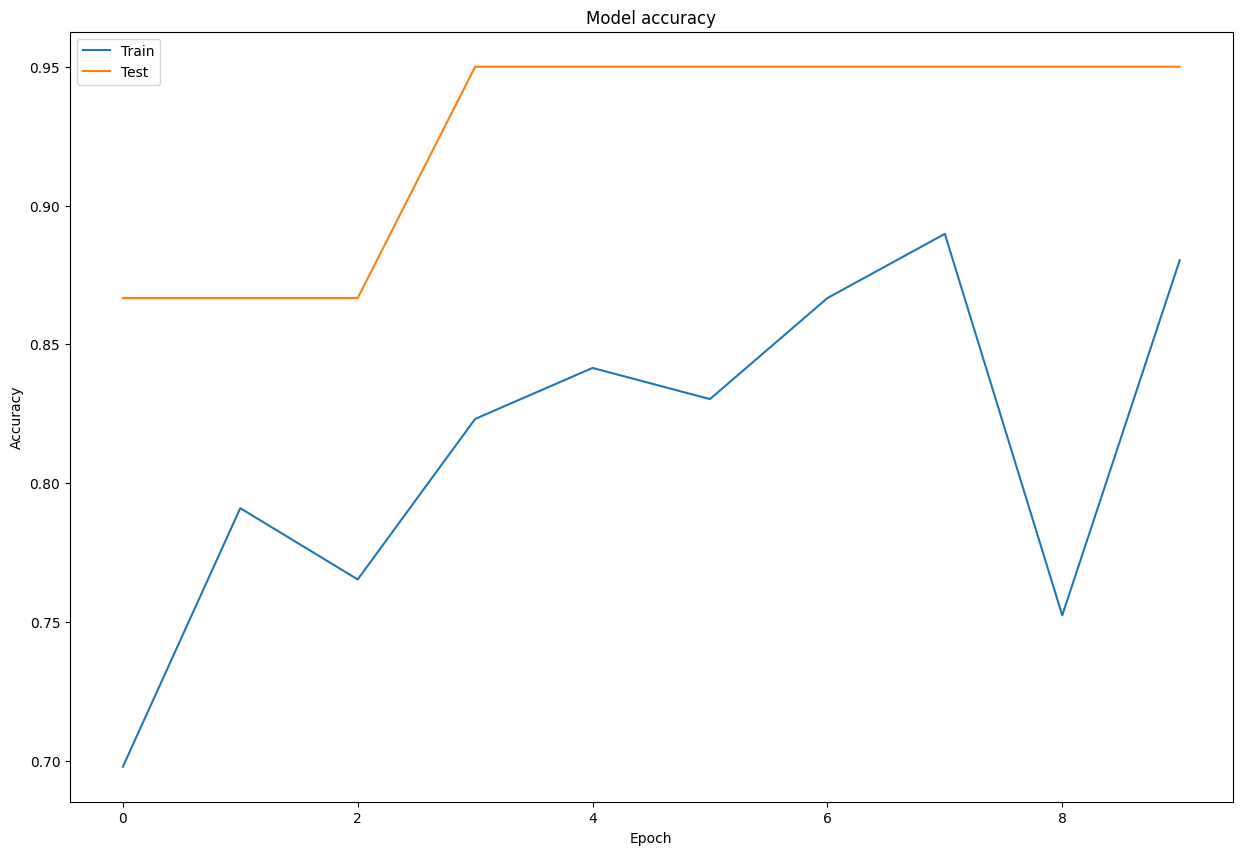

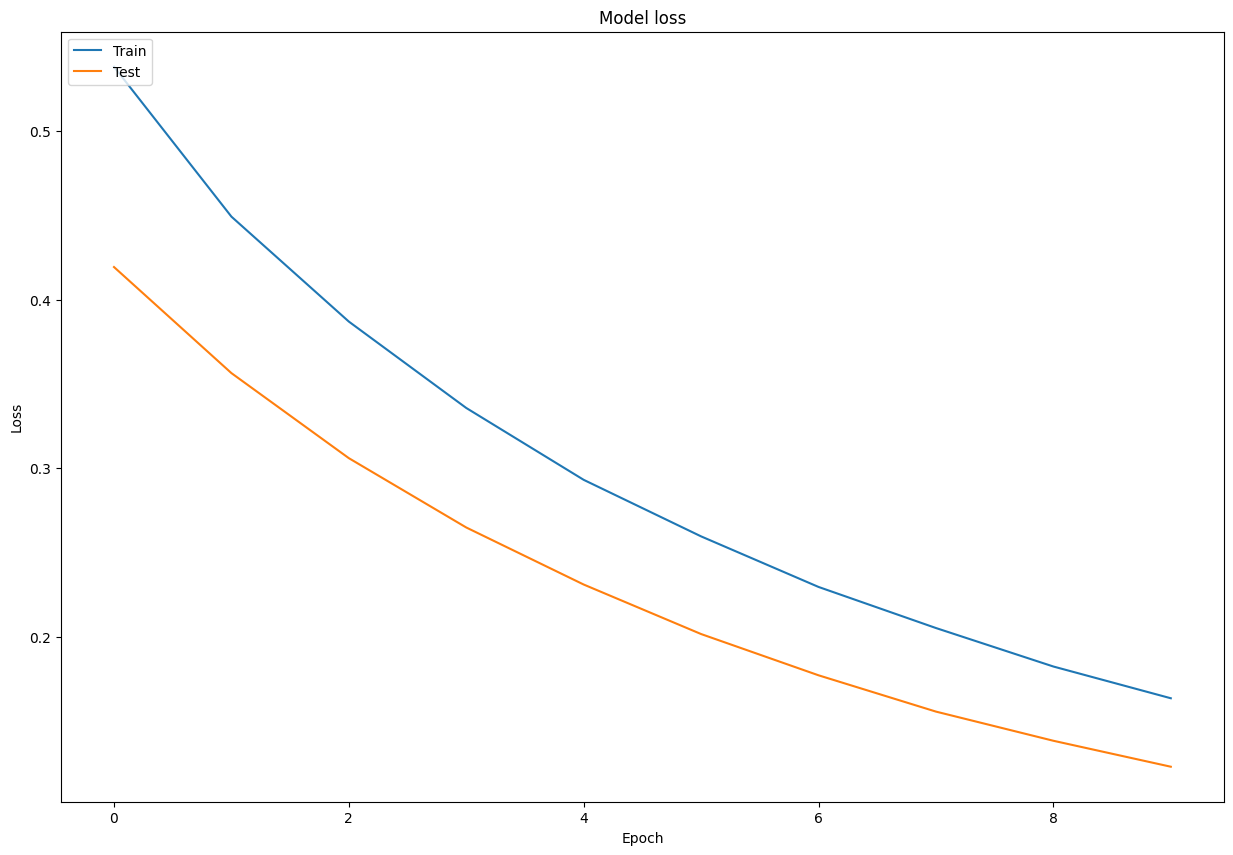

In [127]:
display_f1_m()
display_loss()

In [128]:
f1_1 = results.history['val_f1_m'][-1]

In [129]:
f1_1

0.9499998688697815

In [ ]:
##### Дальше нужно корректировать

K ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns




In [ ]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,Y_train)
f1_2 = f1_m(Y_test, K.round(neigh.predict_proba(X_test)[:,1]))

In [ ]:
f1_2

<tf.Tensor: shape=(), dtype=float64, numpy=0.8342492990996065>

Деревья решений

In [ ]:
from sklearn import tree
#tree = tree.DecisionTreeClassifier()
tree = tree.DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 2)
tree.fit(X_train,Y_train)
f1_3 = f1_m(Y_test, K.round(tree.predict_proba(X_test)[:,1]))

In [ ]:
f1_3

<tf.Tensor: shape=(), dtype=float64, numpy=0.8939526230526473>

In [ ]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Наивный Байесовский классификатор

In [ ]:
from sklearn.naive_bayes import *
clf_nb = GaussianNB()
clf_nb.fit(X_train, Y_train)
f1_4 = f1_m(Y_test, K.round(clf_nb.predict_proba(X_test)[:,1]))
#predicted_nb = clf_nb.predict(X_test)
#print ('NB accuracy = '+str((metrics.accuracy_score(Y_test,predicted_nb))*100)+'%')
#print ('NB f1_4 ='+str((f1_score(Y_test,predicted_nb, average=None))*100)+'%')
#print(classification_report(Y_test, predicted_nb))
#nb_scores = cross_val_score(clf_nb, X_train, Y_train, cv=5)
#print("Accuracy: %0.2f (+/- %0.2f)" % (nb_scores.mean(), nb_scores.std()*2))

In [ ]:
f1_4

<tf.Tensor: shape=(), dtype=float64, numpy=0.18379987629602693>

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:

#clf = GradientBoostingClassifier() 
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=7, random_state=0)
clf.fit(X_train, Y_train)



GradientBoostingClassifier(max_depth=7, n_estimators=150, random_state=0)

In [ ]:
f1_5 = f1_m(Y_test, K.round(clf.predict_proba(X_test)[:,1]))

In [ ]:
f1_5

<tf.Tensor: shape=(), dtype=float64, numpy=0.9515839308889783>

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier



In [ ]:
forest = RandomForestClassifier()
#forest = RandomForestClassifier(random_state= 10, n_estimators=500)
#forest = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, random_state=0)
#forest = RandomForestClassifier(n_estimators=100, max_depth=7)
forest.fit(X_train, Y_train)
f1_6 = f1_m(Y_test, K.round(forest.predict_proba(X_test)[:,1]))

In [ ]:
f1_6

<tf.Tensor: shape=(), dtype=float64, numpy=0.4729669968136436>

ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, Y_train)


ExtraTreesClassifier(n_estimators=50, random_state=0)

In [ ]:
f1_7 = f1_m(Y_test, K.round(clf.predict_proba(X_test)[:,1]))
f1_7

<tf.Tensor: shape=(), dtype=float64, numpy=0.7603423208461397>

Метод опорных векторов (SVM)

In [ ]:
from sklearn import metrics 
from sklearn.metrics import * 
from sklearn import svm
from sklearn.svm import SVC

import seaborn as sns                               # для построения графика
import matplotlib.pyplot as plt                     # для построения графика




In [ ]:
clf_svm = svm.LinearSVC() 
#clf_svm = svm.LinearSVC(random_state=1, tol=1e-5)   # сам классификатор
clf_svm.fit(X_train, Y_train)                       # обучение
predicted_svm = clf_svm.predict(X_test)
print('SVM accuracy = '+str((metrics.accuracy_score(Y_test, predicted_svm))*100)+'%') # точность на проверочном наборе
print('SVM F1 = '+str((f1_score(Y_test, predicted_svm, average=None))*100)+'%')       # F-мера на проверочном наборе
print(classification_report(Y_test, predicted_svm))

SVM accuracy = 91.315%
SVM F1 = [95.46036641  0.        ]%
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     18263
         1.0       0.00      0.00      0.00      1737

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.83      0.91      0.87     20000



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1186: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  raw_coef_, n_iter_ = liblinear.train_wrap(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no p

In [ ]:
print("Средняя f1 мера Нейронная сеть", f1_1)
print("Средняя f1 мера К ближайших соседей", float(f1_2))
print("Средняя f1 мера Деревья решений", float(f1_3))
print("Средняя f1 мера Наивный Байесовский классификатор", float(f1_4))
print("Средняя f1 мера Gradient Boosting Classifier", float(f1_5))
print("Средняя f1 мера Random Forest Classifier", float(f1_6))
print("Средняя f1 мера Extra Trees Classifier", float(f1_7))

Средняя f1 мера Нейронная сеть 0.9754812717437744
Средняя f1 мера К ближайших соседей 0.8342492990996065
Средняя f1 мера Деревья решений 0.8939526230526473
Средняя f1 мера Наивный Байесовский классификатор 0.18379987629602693
Средняя f1 мера Gradient Boosting Classifier 0.9515839308889783
Средняя f1 мера Random Forest Classifier 0.7969560225420322
Средняя f1 мера Extra Trees Classifier 0.7603423208461397


Итоговая оценка

In [ ]:
print(f1_1, float(f1_3), float(f1_5))
print("Средняя f1 мера составляет", float(f1_1+f1_3+f1_5)/3)
print("Количество баллов равно", max(min(22,float(f1_1*100+f1_3*100+f1_5*100)/3-75),0))

0.9754812717437744 0.8939526230526473 0.9515839308889783
Средняя f1 мера составляет 0.9403392752284666
Количество баллов равно 19.033927522846668


Для достижения результата можно попробовать Gradient Boosted trees, Random Forest, Naive Bayes и другие варианты классификаторов, к оценке будут приняты 3 наилучших варианта.